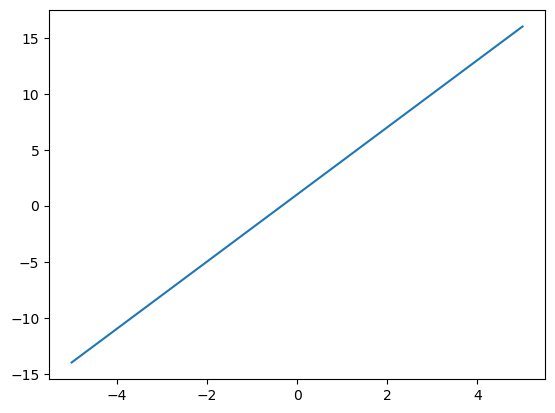

In [8]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5,5,num=1000)
fx = 3*x + 1
result = plt.plot(x,fx)
plt.show()


=== 경사하강법 완전 분석 ===

1. 1차원 함수에서의 경사하강법


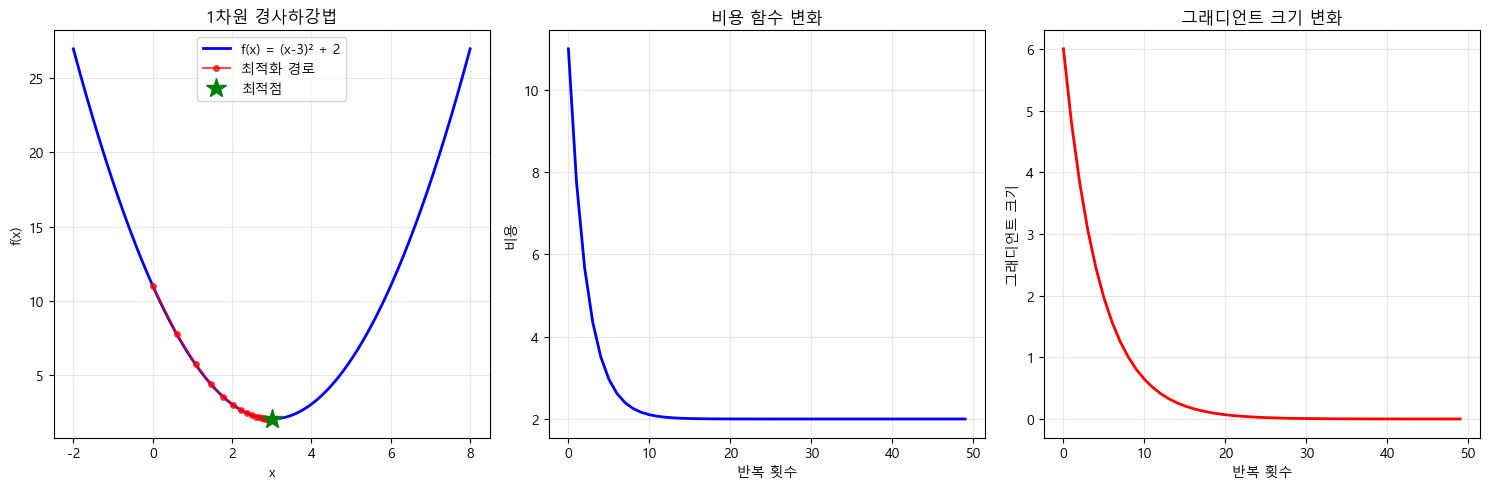

최적 x: 2.999957
최소 비용: 2.000000

2. 2차원 함수에서의 경사하강법


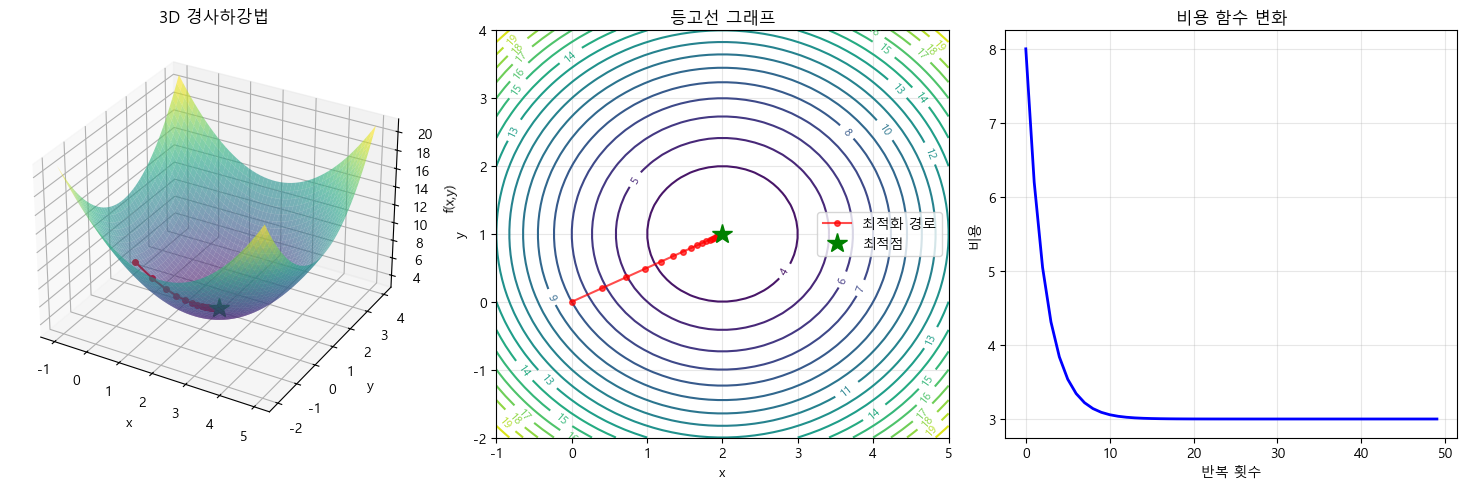

최적 (x, y): (1.999971, 0.999986)
최소 비용: 3.000000

3. 학습률에 따른 영향


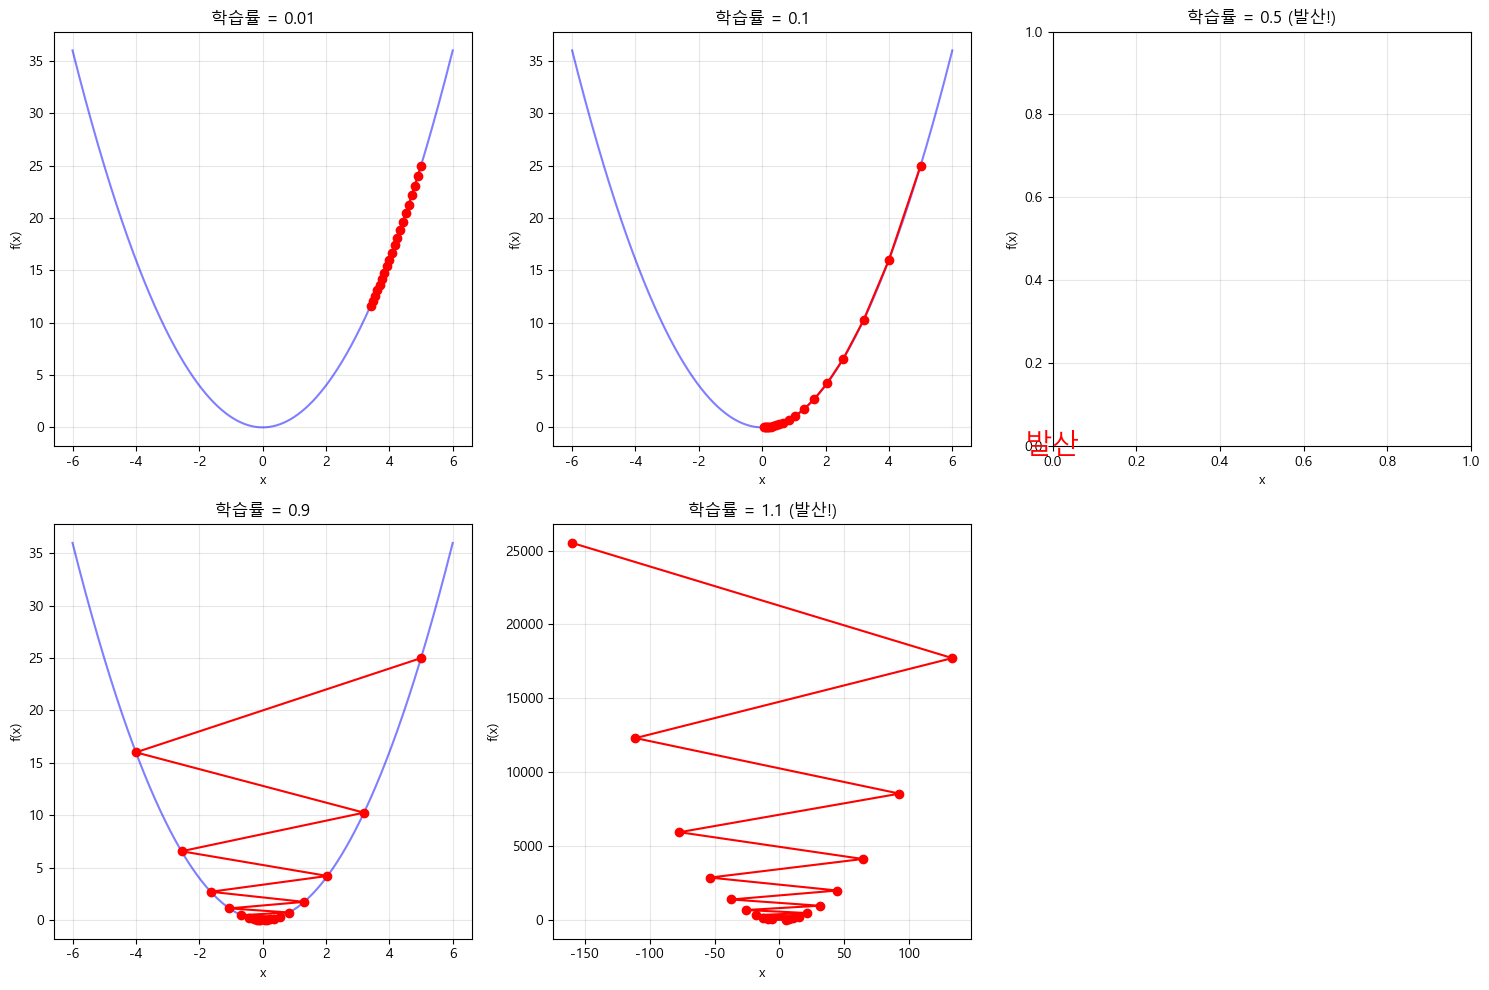


4. 경사하강법 변형들 비교
수렴 달성! 반복: 146, 최종 비용: 0.000000


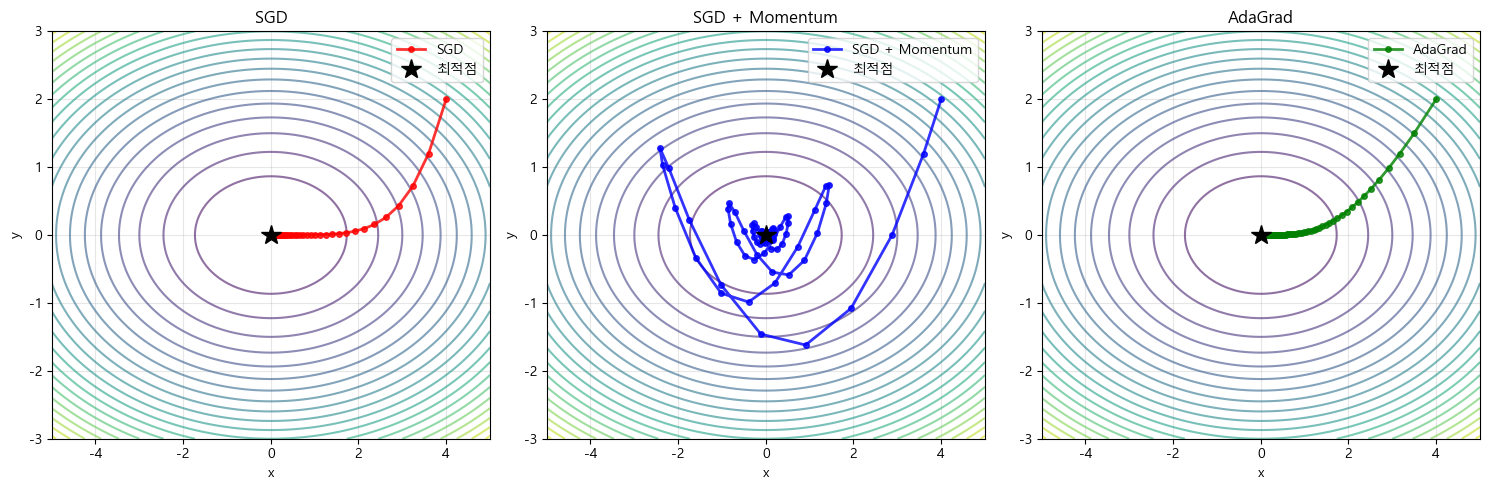


5. 선형회귀에 경사하강법 적용
수렴 달성! 반복: 184, 최종 비용: 0.004418


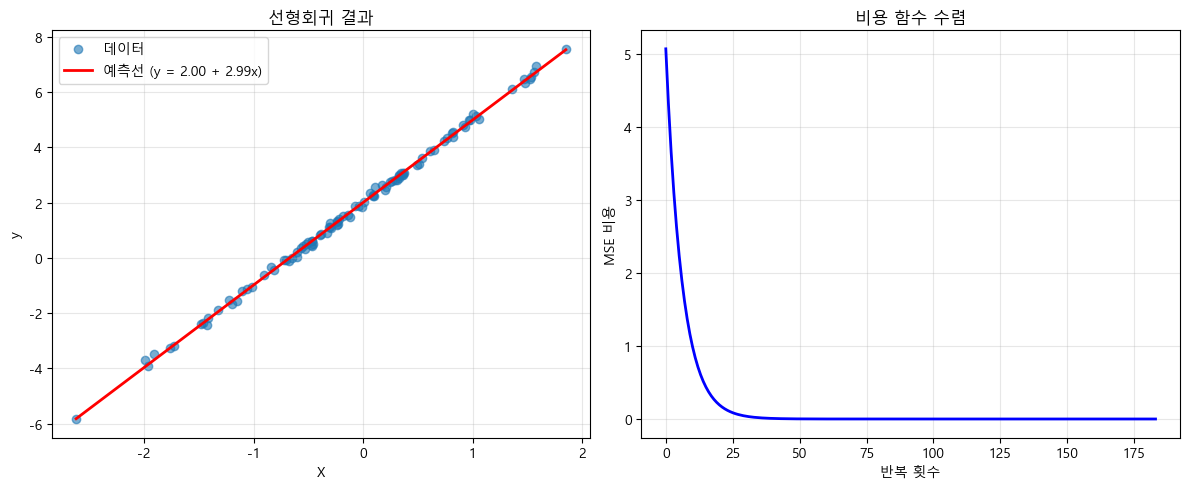

최적 파라미터: θ₀ = 2.0007, θ₁ = 2.9857
실제 파라미터: θ₀ = 2.0000, θ₁ = 3.0000

6. 신경망에서의 경사하강법
Epoch 0, Cost: 0.255830
Epoch 1000, Cost: 0.234322
Epoch 2000, Cost: 0.138707
Epoch 3000, Cost: 0.130367
Epoch 4000, Cost: 0.128227

=== XOR 문제 결과 ===
입력 -> 실제 -> 예측
[0 0] -> 0 -> 0.0436
[0 1] -> 1 -> 0.4968
[1 0] -> 1 -> 0.9593
[1 1] -> 0 -> 0.5024


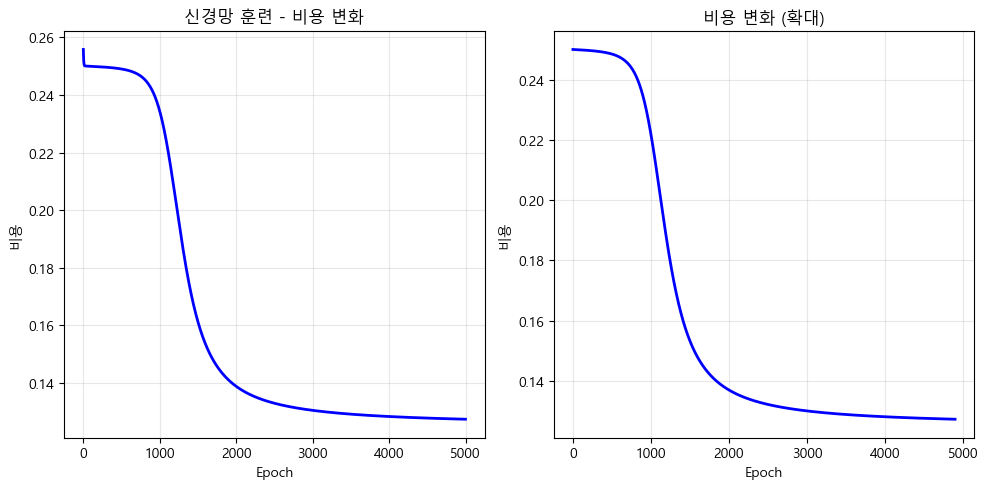


7. 경사하강법의 도전과제
=== 경사하강법의 주요 도전과제 ===

1. 지역 최솟값 (Local Minima) 문제
   - 전역 최솟값이 아닌 지역 최솟값에 갇힐 수 있음
   - 해결책: 다양한 초기값, Momentum, 확률적 방법 사용



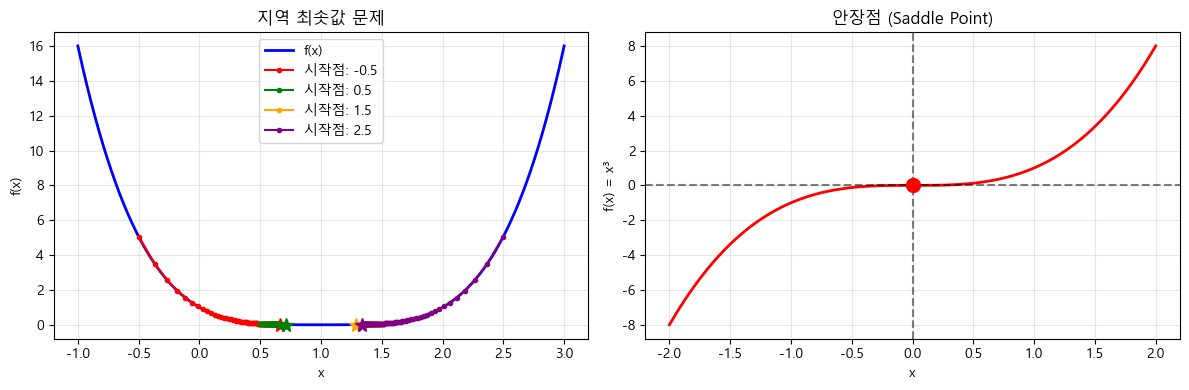

2. 학습률 (Learning Rate) 문제
   - 너무 크면: 발산하거나 진동
   - 너무 작으면: 수렴 속도가 매우 느림
   - 해결책: 적응적 학습률, 학습률 스케줄링

3. 차원의 저주 (Curse of Dimensionality)
   - 고차원에서 그래디언트 계산이 비효율적
   - 그래디언트가 희소해짐
   - 해결책: 배치 정규화, 차원 감소 기법

4. 특성 스케일링 문제
   - 특성들의 스케일이 다르면 비효율적 학습
   - 일부 방향으로 느린 수렴
   - 해결책: 표준화, 정규화



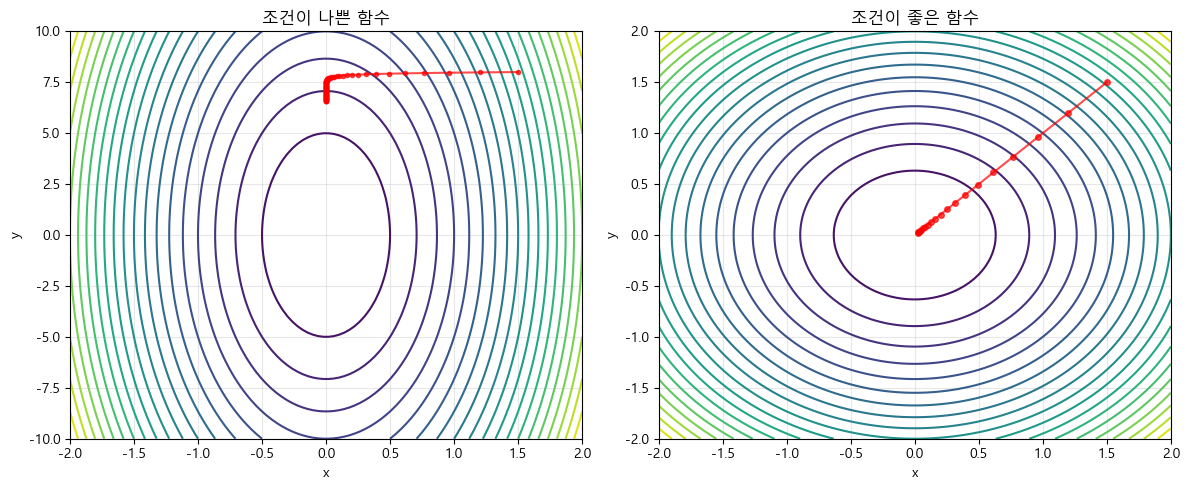


8. 현대적 최적화 방법들
=== 현대적 최적화 방법들 ===

📌 SGD (Stochastic Gradient Descent)
   장점: 단순함, 메모리 효율적, 대용량 데이터 처리 가능
   단점: 노이즈가 많음, 수렴 속도 느림
   사용처: 기본적인 딥러닝 모델

📌 Momentum
   장점: 빠른 수렴, 지역 최솟값 탈출, 진동 감소
   단점: 하이퍼파라미터 추가
   사용처: 일반적인 딥러닝 훈련

📌 Adam
   장점: 적응적 학습률, 빠른 수렴, 안정적
   단점: 메모리 사용량 많음, 과적합 경향
   사용처: 대부분의 딥러닝 모델

📌 AdaGrad
   장점: 적응적 학습률, 희소 데이터에 효과적
   단점: 학습률이 너무 빨리 감소
   사용처: 자연어 처리, 희소 특성

📌 RMSprop
   장점: AdaGrad의 개선, 안정적인 학습률
   단점: 하이퍼파라미터 조정 필요
   사용처: RNN, 순환 신경망



In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = ['Malgun Gothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

class GradientDescent:
    """경사하강법 구현 클래스"""
    
    def __init__(self, learning_rate=0.01, max_iterations=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.history = {'params': [], 'costs': [], 'gradients': []}
    
    def compute_cost_and_gradient(self, params, cost_function, gradient_function):
        """비용과 그래디언트 계산"""
        cost = cost_function(params)
        gradient = gradient_function(params)
        return cost, gradient
    
    def optimize(self, initial_params, cost_function, gradient_function):
        """경사하강법 최적화 수행"""
        params = np.array(initial_params, dtype=float)
        
        for i in range(self.max_iterations):
            # 현재 비용과 그래디언트 계산
            cost, gradient = self.compute_cost_and_gradient(params, cost_function, gradient_function)
            
            # 기록 저장
            self.history['params'].append(params.copy())
            self.history['costs'].append(cost)
            self.history['gradients'].append(np.linalg.norm(gradient))
            
            # 수렴 확인
            if np.linalg.norm(gradient) < self.tolerance:
                print(f"수렴 달성! 반복: {i+1}, 최종 비용: {cost:.6f}")
                break
            
            # 파라미터 업데이트
            params = params - self.learning_rate * gradient
        
        return params, self.history

def example_1d_function():
    """1차원 함수 경사하강법 예시"""
    
    # 함수: f(x) = (x-3)² + 2
    def cost_function(x):
        return (x - 3) ** 2 + 2
    
    def gradient_function(x):
        return 2 * (x - 3)
    
    # 경사하강법 수행
    gd = GradientDescent(learning_rate=0.1, max_iterations=50)
    optimal_x, history = gd.optimize([0.0], cost_function, gradient_function)
    
    # 시각화
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # 함수 그래프와 최적화 경로
    x_range = np.linspace(-2, 8, 1000)
    y_range = cost_function(x_range)
    
    ax1.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = (x-3)² + 2')
    
    # 최적화 경로
    path_x = [p[0] for p in history['params']]
    path_y = [cost_function(p[0]) for p in history['params']]
    
    ax1.plot(path_x, path_y, 'ro-', markersize=4, alpha=0.7, label='최적화 경로')
    ax1.plot(optimal_x[0], cost_function(optimal_x[0]), 'g*', markersize=15, label='최적점')
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    ax1.set_title('1차원 경사하강법')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 비용 함수 변화
    ax2.plot(history['costs'], 'b-', linewidth=2)
    ax2.set_xlabel('반복 횟수')
    ax2.set_ylabel('비용')
    ax2.set_title('비용 함수 변화')
    ax2.grid(True, alpha=0.3)
    
    # 그래디언트 크기 변화
    ax3.plot(history['gradients'], 'r-', linewidth=2)
    ax3.set_xlabel('반복 횟수')
    ax3.set_ylabel('그래디언트 크기')
    ax3.set_title('그래디언트 크기 변화')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"최적 x: {optimal_x[0]:.6f}")
    print(f"최소 비용: {cost_function(optimal_x[0]):.6f}")

def example_2d_function():
    """2차원 함수 경사하강법 예시"""
    
    # 함수: f(x,y) = (x-2)² + (y-1)² + 3
    def cost_function(params):
        x, y = params
        return (x - 2) ** 2 + (y - 1) ** 2 + 3
    
    def gradient_function(params):
        x, y = params
        dx = 2 * (x - 2)
        dy = 2 * (y - 1)
        return np.array([dx, dy])
    
    # 경사하강법 수행
    gd = GradientDescent(learning_rate=0.1, max_iterations=50)
    optimal_params, history = gd.optimize([0.0, 0.0], cost_function, gradient_function)
    
    # 3D 시각화
    fig = plt.figure(figsize=(15, 5))
    
    # 3D 표면 그래프
    ax1 = fig.add_subplot(131, projection='3d')
    
    x_range = np.linspace(-1, 5, 50)
    y_range = np.linspace(-2, 4, 50)
    X, Y = np.meshgrid(x_range, y_range)
    Z = (X - 2) ** 2 + (Y - 1) ** 2 + 3
    
    ax1.plot_surface(X, Y, Z, alpha=0.6, cmap='viridis')
    
    # 최적화 경로
    path_x = [p[0] for p in history['params']]
    path_y = [p[1] for p in history['params']]
    path_z = [cost_function(p) for p in history['params']]
    
    ax1.plot(path_x, path_y, path_z, 'ro-', markersize=4, label='최적화 경로')
    ax1.plot([optimal_params[0]], [optimal_params[1]], [cost_function(optimal_params)], 
             'g*', markersize=15, label='최적점')
    
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f(x,y)')
    ax1.set_title('3D 경사하강법')
    
    # 등고선 그래프
    ax2 = fig.add_subplot(132)
    contour = ax2.contour(X, Y, Z, levels=20)
    ax2.clabel(contour, inline=True, fontsize=8)
    ax2.plot(path_x, path_y, 'ro-', markersize=4, alpha=0.7, label='최적화 경로')
    ax2.plot(optimal_params[0], optimal_params[1], 'g*', markersize=15, label='최적점')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('등고선 그래프')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 비용 변화
    ax3 = fig.add_subplot(133)
    ax3.plot(history['costs'], 'b-', linewidth=2)
    ax3.set_xlabel('반복 횟수')
    ax3.set_ylabel('비용')
    ax3.set_title('비용 함수 변화')
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"최적 (x, y): ({optimal_params[0]:.6f}, {optimal_params[1]:.6f})")
    print(f"최소 비용: {cost_function(optimal_params):.6f}")

def learning_rate_comparison():
    """학습률에 따른 경사하강법 비교"""
    
    def cost_function(x):
        return x ** 2
    
    def gradient_function(x):
        return 2 * x
    
    learning_rates = [0.01, 0.1, 0.5, 0.9, 1.1]
    
    plt.figure(figsize=(15, 10))
    
    for i, lr in enumerate(learning_rates):
        plt.subplot(2, 3, i + 1)
        
        gd = GradientDescent(learning_rate=lr, max_iterations=20)
        try:
            optimal_x, history = gd.optimize([5.0], cost_function, gradient_function)
            
            # 함수 그래프
            x_range = np.linspace(-6, 6, 1000)
            y_range = cost_function(x_range)
            plt.plot(x_range, y_range, 'b-', alpha=0.5)
            
            # 최적화 경로
            path_x = [p[0] for p in history['params']]
            path_y = [cost_function(p[0]) for p in history['params']]
            
            plt.plot(path_x, path_y, 'ro-', markersize=6)
            plt.title(f'학습률 = {lr}')
            
            if lr >= 1.0:
                plt.title(f'학습률 = {lr} (발산!)')
            
        except:
            plt.title(f'학습률 = {lr} (발산!)')
            plt.text(0, 0, '발산', ha='center', va='center', fontsize=20, color='red')
        
        plt.grid(True, alpha=0.3)
        plt.xlabel('x')
        plt.ylabel('f(x)')
    
    plt.tight_layout()
    plt.show()

def gradient_descent_variants():
    """경사하강법 변형들 비교"""
    
    # 함수: f(x,y) = 0.5*x² + 2*y² (타원형)
    def cost_function(params):
        x, y = params
        return 0.5 * x ** 2 + 2 * y ** 2
    
    def gradient_function(params):
        x, y = params
        return np.array([x, 4 * y])
    
    # 다양한 경사하강법 구현
    class SGD(GradientDescent):
        """기본 경사하강법"""
        pass
    
    class SGDMomentum(GradientDescent):
        """모멘텀을 사용한 경사하강법"""
        def __init__(self, learning_rate=0.01, momentum=0.9, **kwargs):
            super().__init__(learning_rate=learning_rate, **kwargs)
            self.momentum = momentum
            self.velocity = None
        
        def optimize(self, initial_params, cost_function, gradient_function):
            params = np.array(initial_params, dtype=float)
            self.velocity = np.zeros_like(params)
            
            for i in range(self.max_iterations):
                cost, gradient = self.compute_cost_and_gradient(params, cost_function, gradient_function)
                
                self.history['params'].append(params.copy())
                self.history['costs'].append(cost)
                self.history['gradients'].append(np.linalg.norm(gradient))
                
                if np.linalg.norm(gradient) < self.tolerance:
                    break
                
                # 모멘텀 업데이트
                self.velocity = self.momentum * self.velocity - self.learning_rate * gradient
                params = params + self.velocity
            
            return params, self.history
    
    class AdaGrad(GradientDescent):
        """AdaGrad 최적화"""
        def __init__(self, learning_rate=0.01, epsilon=1e-8, **kwargs):
            super().__init__(learning_rate=learning_rate, **kwargs)
            self.epsilon = epsilon
            self.sum_squared_gradients = None
        
        def optimize(self, initial_params, cost_function, gradient_function):
            params = np.array(initial_params, dtype=float)
            self.sum_squared_gradients = np.zeros_like(params)
            
            for i in range(self.max_iterations):
                cost, gradient = self.compute_cost_and_gradient(params, cost_function, gradient_function)
                
                self.history['params'].append(params.copy())
                self.history['costs'].append(cost)
                self.history['gradients'].append(np.linalg.norm(gradient))
                
                if np.linalg.norm(gradient) < self.tolerance:
                    break
                
                # AdaGrad 업데이트
                self.sum_squared_gradients += gradient ** 2
                adapted_lr = self.learning_rate / (np.sqrt(self.sum_squared_gradients) + self.epsilon)
                params = params - adapted_lr * gradient
            
            return params, self.history
    
    # 각 방법 비교
    methods = {
        'SGD': SGD(learning_rate=0.1),
        'SGD + Momentum': SGDMomentum(learning_rate=0.1, momentum=0.9),
        'AdaGrad': AdaGrad(learning_rate=0.5)
    }
    
    plt.figure(figsize=(15, 5))
    
    # 등고선 그래프 준비
    x_range = np.linspace(-5, 5, 100)
    y_range = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x_range, y_range)
    Z = 0.5 * X ** 2 + 2 * Y ** 2
    
    colors = ['red', 'blue', 'green']
    
    for i, (name, optimizer) in enumerate(methods.items()):
        plt.subplot(1, 3, i + 1)
        
        # 등고선
        plt.contour(X, Y, Z, levels=20, alpha=0.6)
        
        # 최적화 수행
        optimal_params, history = optimizer.optimize([4, 2], cost_function, gradient_function)
        
        # 경로 시각화
        path_x = [p[0] for p in history['params']]
        path_y = [p[1] for p in history['params']]
        
        plt.plot(path_x, path_y, 'o-', color=colors[i], markersize=4, 
                linewidth=2, alpha=0.8, label=name)
        plt.plot(0, 0, 'k*', markersize=15, label='최적점')
        
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'{name}')
        plt.legend()
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def linear_regression_gradient_descent():
    """선형회귀에 경사하강법 적용"""
    
    # 가상 데이터 생성
    np.random.seed(42)
    X = np.random.randn(100, 1)
    y = 3 * X.squeeze() + 2 + 0.1 * np.random.randn(100)
    
    # 특성에 bias 추가
    X_with_bias = np.c_[np.ones(X.shape[0]), X]
    
    # 비용 함수 (MSE)
    def cost_function(theta):
        m = len(y)
        predictions = X_with_bias.dot(theta)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        return cost
    
    # 그래디언트 함수
    def gradient_function(theta):
        m = len(y)
        predictions = X_with_bias.dot(theta)
        gradient = (1 / m) * X_with_bias.T.dot(predictions - y)
        return gradient
    
    # 경사하강법 수행
    gd = GradientDescent(learning_rate=0.1, max_iterations=1000)
    optimal_theta, history = gd.optimize([0, 0], cost_function, gradient_function)
    
    # 결과 시각화
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # 데이터와 회귀선
    ax1.scatter(X, y, alpha=0.6, label='데이터')
    
    # 최종 회귀선
    x_line = np.linspace(X.min(), X.max(), 100)
    y_line = optimal_theta[0] + optimal_theta[1] * x_line
    ax1.plot(x_line, y_line, 'r-', linewidth=2, label=f'예측선 (y = {optimal_theta[0]:.2f} + {optimal_theta[1]:.2f}x)')
    
    ax1.set_xlabel('X')
    ax1.set_ylabel('y')
    ax1.set_title('선형회귀 결과')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 비용 변화
    ax2.plot(history['costs'], 'b-', linewidth=2)
    ax2.set_xlabel('반복 횟수')
    ax2.set_ylabel('MSE 비용')
    ax2.set_title('비용 함수 수렴')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"최적 파라미터: θ₀ = {optimal_theta[0]:.4f}, θ₁ = {optimal_theta[1]:.4f}")
    print(f"실제 파라미터: θ₀ = 2.0000, θ₁ = 3.0000")

def neural_network_gradient_descent():
    """신경망에서 경사하강법 적용 예시"""
    
    # XOR 문제 데이터
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])
    
    # 신경망 파라미터 초기화
    np.random.seed(42)
    W1 = np.random.randn(2, 2)  # 입력층 -> 은닉층
    b1 = np.zeros((1, 2))       # 은닉층 bias
    W2 = np.random.randn(2, 1)  # 은닉층 -> 출력층
    b2 = np.zeros((1, 1))       # 출력층 bias
    
    def sigmoid(z):
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))
    
    def sigmoid_derivative(z):
        return z * (1 - z)
    
    # 순전파
    def forward_pass(X, W1, b1, W2, b2):
        z1 = X.dot(W1) + b1
        a1 = sigmoid(z1)
        z2 = a1.dot(W2) + b2
        a2 = sigmoid(z2)
        return a1, a2
    
    # 비용 함수
    def compute_cost(params):
        W1, b1, W2, b2 = params
        _, a2 = forward_pass(X, W1, b1, W2, b2)
        cost = np.mean((a2 - y) ** 2)
        return cost
    
    # 그래디언트 계산
    def compute_gradients(params):
        W1, b1, W2, b2 = params
        m = X.shape[0]
        
        # 순전파
        a1, a2 = forward_pass(X, W1, b1, W2, b2)
        
        # 역전파
        dz2 = (a2 - y) * sigmoid_derivative(a2)
        dW2 = (1/m) * a1.T.dot(dz2)
        db2 = (1/m) * np.sum(dz2, axis=0, keepdims=True)
        
        dz1 = dz2.dot(W2.T) * sigmoid_derivative(a1)
        dW1 = (1/m) * X.T.dot(dz1)
        db1 = (1/m) * np.sum(dz1, axis=0, keepdims=True)
        
        return [dW1, db1, dW2, db2]
    
    # 경사하강법 훈련
    learning_rate = 1.0
    epochs = 5000
    cost_history = []
    
    params = [W1, b1, W2, b2]
    
    for epoch in range(epochs):
        # 비용 계산
        cost = compute_cost(params)
        cost_history.append(cost)
        
        # 그래디언트 계산
        gradients = compute_gradients(params)
        
        # 파라미터 업데이트
        for i in range(len(params)):
            params[i] = params[i] - learning_rate * gradients[i]
        
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Cost: {cost:.6f}")
    
    # 최종 예측
    _, final_predictions = forward_pass(X, *params)
    
    print("\n=== XOR 문제 결과 ===")
    print("입력 -> 실제 -> 예측")
    for i in range(len(X)):
        print(f"{X[i]} -> {y[i][0]} -> {final_predictions[i][0]:.4f}")
    
    # 비용 변화 시각화
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(cost_history, 'b-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('비용')
    plt.title('신경망 훈련 - 비용 변화')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.plot(cost_history[100:], 'b-', linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('비용')
    plt.title('비용 변화 (확대)')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def gradient_descent_challenges():
    """경사하강법의 도전과제들"""
    
    print("=== 경사하강법의 주요 도전과제 ===\n")
    
    # 1. 지역 최솟값 문제
    def local_minima_example():
        print("1. 지역 최솟값 (Local Minima) 문제")
        print("   - 전역 최솟값이 아닌 지역 최솟값에 갇힐 수 있음")
        print("   - 해결책: 다양한 초기값, Momentum, 확률적 방법 사용\n")
        
        # 여러 지역 최솟값이 있는 함수
        def multimodal_function(x):
            return x**4 - 4*x**3 + 6*x**2 - 4*x + 1
        
        def multimodal_gradient(x):
            return 4*x**3 - 12*x**2 + 12*x - 4
        
        # 다양한 시작점에서 최적화
        start_points = [-0.5, 0.5, 1.5, 2.5]
        
        plt.figure(figsize=(12, 4))
        
        x_range = np.linspace(-1, 3, 1000)
        y_range = multimodal_function(x_range)
        
        plt.subplot(1, 2, 1)
        plt.plot(x_range, y_range, 'b-', linewidth=2, label='f(x)')
        
        colors = ['red', 'green', 'orange', 'purple']
        for i, start in enumerate(start_points):
            gd = GradientDescent(learning_rate=0.01, max_iterations=100)
            optimal_x, history = gd.optimize([start], multimodal_function, multimodal_gradient)
            
            path_x = [p[0] for p in history['params']]
            path_y = [multimodal_function(p[0]) for p in history['params']]
            
            plt.plot(path_x, path_y, 'o-', color=colors[i], 
                    label=f'시작점: {start}', markersize=3)
            plt.plot(optimal_x[0], multimodal_function(optimal_x[0]), 
                    '*', color=colors[i], markersize=10)
        
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.title('지역 최솟값 문제')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 안장점 예시
        plt.subplot(1, 2, 2)
        x = np.linspace(-2, 2, 100)
        y = x**3
        plt.plot(x, y, 'r-', linewidth=2)
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
        plt.axvline(x=0, color='k', linestyle='--', alpha=0.5)
        plt.scatter([0], [0], color='red', s=100, zorder=5)
        plt.xlabel('x')
        plt.ylabel('f(x) = x³')
        plt.title('안장점 (Saddle Point)')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    # 2. 학습률 문제
    def learning_rate_issues():
        print("2. 학습률 (Learning Rate) 문제")
        print("   - 너무 크면: 발산하거나 진동")
        print("   - 너무 작으면: 수렴 속도가 매우 느림")
        print("   - 해결책: 적응적 학습률, 학습률 스케줄링\n")
    
    # 3. 차원의 저주
    def curse_of_dimensionality():
        print("3. 차원의 저주 (Curse of Dimensionality)")
        print("   - 고차원에서 그래디언트 계산이 비효율적")
        print("   - 그래디언트가 희소해짐")
        print("   - 해결책: 배치 정규화, 차원 감소 기법\n")
    
    # 4. 스케일링 문제
    def scaling_issues():
        print("4. 특성 스케일링 문제")
        print("   - 특성들의 스케일이 다르면 비효율적 학습")
        print("   - 일부 방향으로 느린 수렴")
        print("   - 해결책: 표준화, 정규화\n")
        
        # 스케일링 문제 시각화
        def ill_conditioned_function(params):
            x, y = params
            return 100 * x**2 + y**2  # y축이 x축보다 100배 급한 경사
        
        def ill_conditioned_gradient(params):
            x, y = params
            return np.array([200 * x, 2 * y])
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # 조건이 나쁜 함수
        x_range = np.linspace(-2, 2, 100)
        y_range = np.linspace(-10, 10, 100)
        X, Y = np.meshgrid(x_range, y_range)
        Z = 100 * X**2 + Y**2
        
        ax1.contour(X, Y, Z, levels=20)
        
        gd1 = GradientDescent(learning_rate=0.001, max_iterations=100)
        optimal_params1, history1 = gd1.optimize([1.5, 8], ill_conditioned_function, ill_conditioned_gradient)
        
        path_x1 = [p[0] for p in history1['params']]
        path_y1 = [p[1] for p in history1['params']]
        
        ax1.plot(path_x1, path_y1, 'ro-', markersize=3, alpha=0.7)
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('조건이 나쁜 함수')
        ax1.grid(True, alpha=0.3)
        
        # 조건이 좋은 함수 (정규화 후)
        def well_conditioned_function(params):
            x, y = params
            return x**2 + y**2
        
        def well_conditioned_gradient(params):
            x, y = params
            return np.array([2 * x, 2 * y])
        
        x_range = np.linspace(-2, 2, 100)
        y_range = np.linspace(-2, 2, 100)
        X, Y = np.meshgrid(x_range, y_range)
        Z = X**2 + Y**2
        
        ax2.contour(X, Y, Z, levels=20)
        
        gd2 = GradientDescent(learning_rate=0.1, max_iterations=20)
        optimal_params2, history2 = gd2.optimize([1.5, 1.5], well_conditioned_function, well_conditioned_gradient)
        
        path_x2 = [p[0] for p in history2['params']]
        path_y2 = [p[1] for p in history2['params']]
        
        ax2.plot(path_x2, path_y2, 'ro-', markersize=4, alpha=0.7)
        ax2.set_xlabel('x')
        ax2.set_ylabel('y')
        ax2.set_title('조건이 좋은 함수')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    local_minima_example()
    learning_rate_issues()
    curse_of_dimensionality()
    scaling_issues()

def modern_optimization_methods():
    """현대적 최적화 방법들"""
    
    print("=== 현대적 최적화 방법들 ===\n")
    
    optimization_methods = {
        "SGD (Stochastic Gradient Descent)": {
            "장점": ["단순함", "메모리 효율적", "대용량 데이터 처리 가능"],
            "단점": ["노이즈가 많음", "수렴 속도 느림"],
            "사용처": ["기본적인 딥러닝 모델"]
        },
        
        "Momentum": {
            "장점": ["빠른 수렴", "지역 최솟값 탈출", "진동 감소"],
            "단점": ["하이퍼파라미터 추가"],
            "사용처": ["일반적인 딥러닝 훈련"]
        },
        
        "Adam": {
            "장점": ["적응적 학습률", "빠른 수렴", "안정적"],
            "단점": ["메모리 사용량 많음", "과적합 경향"],
            "사용처": ["대부분의 딥러닝 모델"]
        },
        
        "AdaGrad": {
            "장점": ["적응적 학습률", "희소 데이터에 효과적"],
            "단점": ["학습률이 너무 빨리 감소"],
            "사용처": ["자연어 처리", "희소 특성"]
        },
        
        "RMSprop": {
            "장점": ["AdaGrad의 개선", "안정적인 학습률"],
            "단점": ["하이퍼파라미터 조정 필요"],
            "사용처": ["RNN", "순환 신경망"]
        }
    }
    
    for method, details in optimization_methods.items():
        print(f"📌 {method}")
        print(f"   장점: {', '.join(details['장점'])}")
        print(f"   단점: {', '.join(details['단점'])}")
        print(f"   사용처: {', '.join(details['사용처'])}")
        print()

# 모든 예시 실행
if __name__ == "__main__":
    print("=== 경사하강법 완전 분석 ===\n")
    
    print("1. 1차원 함수에서의 경사하강법")
    example_1d_function()
    
    print("\n2. 2차원 함수에서의 경사하강법")
    example_2d_function()
    
    print("\n3. 학습률에 따른 영향")
    learning_rate_comparison()
    
    print("\n4. 경사하강법 변형들 비교")
    gradient_descent_variants()
    
    print("\n5. 선형회귀에 경사하강법 적용")
    linear_regression_gradient_descent()
    
    print("\n6. 신경망에서의 경사하강법")
    neural_network_gradient_descent()
    
    print("\n7. 경사하강법의 도전과제")
    gradient_descent_challenges()
    
    print("\n8. 현대적 최적화 방법들")
    modern_optimization_methods()

In [13]:
import numpy as np

def fx(x):
    return x**3+1

def gx(x):
    return np.sqrt(x+2)

h = gx(fx(2))
i = fx(gx(2))
j = gx(gx(2))

print(h,i,j)

3.3166247903554 9.0 2.0


In [4]:
import math
import numpy as np
import pandas as pd
import scipy
from scipy import special
import cmath
import decimal
from decimal import Decimal
import sympy
import tensorflow as tf
import torch
import time

# 한글 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Malgun Gothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def math_module_sqrt():
    """1. math 모듈의 sqrt 함수"""
    print("=== 1. math 모듈 ===")
    
    # 기본 사용법
    print(f"math.sqrt(16) = {math.sqrt(16)}")
    print(f"math.sqrt(2) = {math.sqrt(2):.10f}")
    
    # 특별한 경우들
    print(f"math.sqrt(0) = {math.sqrt(0)}")
    print(f"math.sqrt(1) = {math.sqrt(1)}")
    
    # 오류 발생 경우
    try:
        result = math.sqrt(-1)
    except ValueError as e:
        print(f"math.sqrt(-1) → ValueError: {e}")
    
    # 무한대
    print(f"math.sqrt(math.inf) = {math.sqrt(math.inf)}")
    
    # 관련 함수들
    print(f"math.pow(16, 0.5) = {math.pow(16, 0.5)}")
    print(f"16 ** 0.5 = {16 ** 0.5}")
    
    print()

def numpy_sqrt():
    """2. NumPy의 sqrt 함수"""
    print("=== 2. NumPy 모듈 ===")
    
    # 스칼라
    print(f"np.sqrt(16) = {np.sqrt(16)}")
    
    # 배열 (벡터화 연산)
    arr = np.array([1, 4, 9, 16, 25])
    print(f"np.sqrt({arr}) = {np.sqrt(arr)}")
    
    # 2차원 배열
    matrix = np.array([[1, 4], [9, 16]])
    print(f"2D 배열의 sqrt:\n{np.sqrt(matrix)}")
    
    # 복소수 지원
    complex_arr = np.array([-1, -4, -9])
    print(f"np.sqrt({complex_arr}) = {np.sqrt(complex_arr)}")
    
    # NaN과 무한대
    special_arr = np.array([0, np.inf, np.nan])
    print(f"특수값들: {np.sqrt(special_arr)}")
    
    # 성능 (벡터화)
    large_arr = np.random.rand(1000000)
    print(f"100만 개 원소 처리 가능 (벡터화)")
    
    print()

def cmath_sqrt():
    """3. cmath 모듈 (복소수 전용)"""
    print("=== 3. cmath 모듈 (복소수) ===")
    
    # 음수의 제곱근
    print(f"cmath.sqrt(-1) = {cmath.sqrt(-1)}")
    print(f"cmath.sqrt(-4) = {cmath.sqrt(-4)}")
    
    # 복소수 입력
    complex_num = 3 + 4j
    print(f"cmath.sqrt({complex_num}) = {cmath.sqrt(complex_num)}")
    
    # 실수도 복소수로 반환
    print(f"cmath.sqrt(16) = {cmath.sqrt(16)}")
    
    print()

def pandas_sqrt():
    """4. pandas의 sqrt 함수"""
    print("=== 4. pandas 모듈 ===")
    
    # Series - np.sqrt() 사용
    s = pd.Series([1, 4, 9, 16, 25])
    print(f"Series sqrt: \n{np.sqrt(s)}")
    
    # DataFrame - np.sqrt() 사용
    df = pd.DataFrame({'A': [1, 4, 9], 'B': [16, 25, 36]})
    print(f"DataFrame sqrt: \n{np.sqrt(df)}")
    
    # 또는 apply 사용
    print(f"Series apply sqrt: \n{s.apply(np.sqrt)}")
    print(f"DataFrame apply sqrt: \n{df.apply(np.sqrt)}")
    
    # NaN 처리
    s_with_nan = pd.Series([1, 4, np.nan, 16])
    print(f"NaN 포함 Series: \n{np.sqrt(s_with_nan)}")
    
    # ** 연산자 사용
    print(f"Series ** 0.5: \n{s ** 0.5}")
    
    print()

def scipy_sqrt():
    """5. scipy 모듈"""
    print("=== 5. scipy 모듈 ===")
    
    # 기본 sqrt (numpy와 동일)
    from scipy import sqrt as scipy_sqrt
    print(f"scipy.sqrt(16) = {scipy_sqrt(16)}")
    
    # 특수 함수들
    from scipy.special import cbrt, sqrt
    print(f"scipy.special.cbrt(8) = {cbrt(8)} (세제곱근)")
    
    # 배열 처리
    arr = np.array([1, 8, 27, 64])
    print(f"cbrt({arr}) = {cbrt(arr)}")
    
    print()

def scipy_sqrt():
    """5. scipy 모듈"""
    print("=== 5. scipy 모듈 ===")
    
    # scipy는 numpy.sqrt를 사용
    import scipy as sp
    print(f"scipy는 numpy.sqrt 사용: {np.sqrt(16)}")
    
    # 특수 함수들
    from scipy.special import cbrt
    print(f"scipy.special.cbrt(8) = {cbrt(8)} (세제곱근)")
    
    # 복소수 제곱근
    from scipy import special
    print(f"scipy.special에는 다양한 특수 함수들 제공")
    
    # 배열 처리
    arr = np.array([1, 8, 27, 64])
    print(f"cbrt({arr}) = {cbrt(arr)}")
    
    # scipy.linalg.sqrtm (행렬의 제곱근)
    from scipy.linalg import sqrtm
    matrix = np.array([[4, 0], [0, 9]])
    print(f"행렬의 제곱근:\n{sqrtm(matrix)}")
    
    print()

def decimal_sqrt():
    """7. decimal 고정밀도 계산"""
    print("=== 7. decimal 모듈 (고정밀도) ===")
    
    # 정밀도 설정
    decimal.getcontext().prec = 50
    
    # 고정밀도 제곱근
    num = Decimal('2')
    result = num.sqrt()
    print(f"고정밀도 sqrt(2) = {result}")
    
    # 부동소수점과 비교
    print(f"math.sqrt(2) = {math.sqrt(2)}")
    print(f"정밀도 차이 확인")
    
    print()

def tensorflow_sqrt():
    """8. TensorFlow"""
    print("=== 8. TensorFlow ===")
    
    # 텐서 생성
    tensor = tf.constant([1.0, 4.0, 9.0, 16.0])
    result = tf.sqrt(tensor)
    print(f"tf.sqrt({tensor.numpy()}) = {result.numpy()}")
    
    # 그래디언트 계산 가능
    with tf.GradientTape() as tape:
        x = tf.Variable(4.0)
        y = tf.sqrt(x)
    
    gradient = tape.gradient(y, x)
    print(f"sqrt(4)의 그래디언트 = {gradient.numpy()}")
    
    print()

def torch_sqrt():
    """9. PyTorch"""
    print("=== 9. PyTorch ===")
    
    # 텐서 생성
    tensor = torch.tensor([1.0, 4.0, 9.0, 16.0])
    result = torch.sqrt(tensor)
    print(f"torch.sqrt({tensor.numpy()}) = {result.numpy()}")
    
    # 자동 미분
    x = torch.tensor(4.0, requires_grad=True)
    y = torch.sqrt(x)
    y.backward()
    
    print(f"sqrt(4)의 그래디언트 = {x.grad.item()}")
    
    print()

def performance_comparison():
    """10. 성능 비교"""
    print("=== 10. 성능 비교 ===")
    
    # 테스트 데이터
    data = np.random.rand(1000000)
    
    # math.sqrt (반복문 필요)
    start = time.time()
    result_math = [math.sqrt(x) for x in data]
    time_math = time.time() - start
    
    # numpy.sqrt (벡터화)
    start = time.time()
    result_numpy = np.sqrt(data)
    time_numpy = time.time() - start
    
    print(f"100만 개 데이터 처리 시간:")
    print(f"math.sqrt (반복문): {time_math:.4f}초")
    print(f"numpy.sqrt (벡터화): {time_numpy:.4f}초")
    print(f"numpy가 {time_math/time_numpy:.1f}배 빠름")
    
    print()

def special_cases_comparison():
    """11. 특수한 경우들 비교"""
    print("=== 11. 특수한 경우들 비교 ===")
    
    test_cases = [
        ("양수", 16),
        ("0", 0),
        ("소수", 2.5),
        ("무한대", float('inf')),
        ("NaN", float('nan')),
        ("음수", -4)
    ]
    
    print(f"{'케이스':<10} {'math':<15} {'numpy':<15} {'cmath':<15}")
    print("-" * 60)
    
    for name, value in test_cases:
        try:
            math_result = f"{math.sqrt(value):.3f}" if not math.isnan(math.sqrt(value)) else "nan"
        except:
            math_result = "Error"
            
        numpy_result = f"{np.sqrt(value):.3f}" if not np.isnan(np.sqrt(value)) else "nan"
        
        cmath_result = cmath.sqrt(value)
        if cmath_result.imag == 0:
            cmath_result = f"{cmath_result.real:.3f}"
        else:
            cmath_result = f"{cmath_result:.3f}"
            
        print(f"{name:<10} {math_result:<15} {numpy_result:<15} {cmath_result:<15}")
    
    print()

def practical_examples():
    """12. 실제 사용 예시들"""
    print("=== 12. 실제 사용 예시들 ===")
    
    print("📐 거리 계산 (유클리드 거리)")
    point1 = np.array([1, 2])
    point2 = np.array([4, 6])
    distance = np.sqrt(np.sum((point1 - point2)**2))
    print(f"두 점 사이의 거리: {distance:.3f}")
    
    print("\n📊 표준편차 계산")
    data = np.array([1, 2, 3, 4, 5])
    variance = np.var(data)
    std_dev = np.sqrt(variance)
    print(f"표준편차: {std_dev:.3f}")
    
    print("\n🎯 정규화 (L2 norm)")
    vector = np.array([3, 4, 5])
    l2_norm = np.sqrt(np.sum(vector**2))
    normalized = vector / l2_norm
    print(f"원본 벡터: {vector}")
    print(f"L2 norm: {l2_norm:.3f}")
    print(f"정규화된 벡터: {normalized}")
    
    print("\n🔍 근사 알고리즘 (뉴턴 방법)")
    def newton_sqrt(n, precision=1e-10):
        x = n / 2  # 초기 추정값
        while abs(x*x - n) > precision:
            x = (x + n/x) / 2
        return x
    
    n = 17
    our_sqrt = newton_sqrt(n)
    math_sqrt = math.sqrt(n)
    print(f"뉴턴 방법으로 sqrt({n}) = {our_sqrt:.10f}")
    print(f"math.sqrt({n}) = {math_sqrt:.10f}")
    print(f"오차: {abs(our_sqrt - math_sqrt):.2e}")
    
    print()

def recommendations():
    """13. 사용 권장사항"""
    print("=== 13. 사용 권장사항 ===")
    
    recommendations = {
        "🔢 단일 숫자": "math.sqrt() - 가장 빠르고 간단",
        "📊 배열/행렬": "numpy.sqrt() - 벡터화된 연산",
        "🔮 복소수": "cmath.sqrt() 또는 numpy.sqrt()",
        "🎯 고정밀도": "decimal.Decimal.sqrt()",
        "🧮 심볼릭": "sympy.sqrt() - 정확한 표현",
        "🤖 딥러닝": "torch.sqrt() 또는 tf.sqrt()",
        "📈 데이터 분석": "pandas.Series.sqrt()",
        "⚡ 성능 중요": "numpy.sqrt() - 가장 빠름",
        "🔬 과학 계산": "scipy 함수들"
    }
    
    for use_case, recommendation in recommendations.items():
        print(f"{use_case}: {recommendation}")
    
    print()

def common_mistakes():
    """14. 흔한 실수들"""
    print("=== 14. 흔한 실수들과 해결책 ===")
    
    print("❌ 실수 1: 음수에 math.sqrt() 사용")
    print("   해결책: cmath.sqrt() 또는 numpy.sqrt() 사용")
    
    print("\n❌ 실수 2: 리스트에 math.sqrt() 직접 사용")
    print("   잘못: [math.sqrt(x) for x in list]")
    print("   올바름: np.sqrt(np.array(list))")
    
    print("\n❌ 실수 3: 정밀도 손실 무시")
    print("   해결책: decimal 모듈 사용")
    
    print("\n❌ 실수 4: 성능 고려 없는 선택")
    print("   대용량 데이터: numpy > math")
    
    print("\n❌ 실수 5: 타입 혼동")
    print("   math.sqrt() → float")
    print("   cmath.sqrt() → complex")
    print("   numpy.sqrt() → numpy 타입 유지")

# 모든 함수 실행
if __name__ == "__main__":
    print("🔢 Python sqrt 함수 완전 가이드\n")
    
    math_module_sqrt()
    numpy_sqrt()
    cmath_sqrt()
    pandas_sqrt()
    scipy_sqrt()
    sympy_sqrt()
    decimal_sqrt()
    
    try:
        tensorflow_sqrt()
    except ImportError:
        print("TensorFlow가 설치되지 않음")
    
    try:
        torch_sqrt()
    except ImportError:
        print("PyTorch가 설치되지 않음")
    
    performance_comparison()
    special_cases_comparison()
    practical_examples()
    recommendations()
    common_mistakes()
    
    print("✅ 가이드 완료!")
    print("\n💡 요약:")
    print("   - 단일 값: math.sqrt()")
    print("   - 배열: numpy.sqrt()")
    print("   - 복소수: cmath.sqrt()")
    print("   - 고정밀도: decimal.Decimal.sqrt()")
    print("   - 딥러닝: torch.sqrt(), tf.sqrt()")

🔢 Python sqrt 함수 완전 가이드

=== 1. math 모듈 ===
math.sqrt(16) = 4.0
math.sqrt(2) = 1.4142135624
math.sqrt(0) = 0.0
math.sqrt(1) = 1.0
math.sqrt(-1) → ValueError: math domain error
math.sqrt(math.inf) = inf
math.pow(16, 0.5) = 4.0
16 ** 0.5 = 4.0

=== 2. NumPy 모듈 ===
np.sqrt(16) = 4.0
np.sqrt([ 1  4  9 16 25]) = [1. 2. 3. 4. 5.]
2D 배열의 sqrt:
[[1. 2.]
 [3. 4.]]
np.sqrt([-1 -4 -9]) = [nan nan nan]
특수값들: [ 0. inf nan]
100만 개 원소 처리 가능 (벡터화)

=== 3. cmath 모듈 (복소수) ===
cmath.sqrt(-1) = 1j
cmath.sqrt(-4) = 2j
cmath.sqrt((3+4j)) = (2+1j)
cmath.sqrt(16) = (4+0j)

=== 4. pandas 모듈 ===
Series sqrt: 
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64
DataFrame sqrt: 
     A    B
0  1.0  4.0
1  2.0  5.0
2  3.0  6.0
Series apply sqrt: 
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64
DataFrame apply sqrt: 
     A    B
0  1.0  4.0
1  2.0  5.0
2  3.0  6.0
NaN 포함 Series: 
0    1.0
1    2.0
2    NaN
3    4.0
dtype: float64
Series ** 0.5: 
0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype

C:\Users\602-01\AppData\Local\Temp\ipykernel_10456\147426409.py:63: RuntimeWarning: invalid value encountered in sqrt
  print(f"np.sqrt({complex_arr}) = {np.sqrt(complex_arr)}")


sqrt(4)의 그래디언트 = 0.25

=== 10. 성능 비교 ===
100만 개 데이터 처리 시간:
math.sqrt (반복문): 0.1756초
numpy.sqrt (벡터화): 0.0029초
numpy가 60.6배 빠름

=== 11. 특수한 경우들 비교 ===
케이스        math            numpy           cmath          
------------------------------------------------------------
양수         4.000           4.000           4.000          
0          0.000           0.000           0.000          
소수         1.581           1.581           1.581          
무한대        inf             inf             inf            
NaN        nan             nan             nan+nanj       
음수         Error           nan             0.000+2.000j   

=== 12. 실제 사용 예시들 ===
📐 거리 계산 (유클리드 거리)
두 점 사이의 거리: 5.000

📊 표준편차 계산
표준편차: 1.414

🎯 정규화 (L2 norm)
원본 벡터: [3 4 5]
L2 norm: 7.071
정규화된 벡터: [0.42426407 0.56568542 0.70710678]

🔍 근사 알고리즘 (뉴턴 방법)
뉴턴 방법으로 sqrt(17) = 4.1231056256
math.sqrt(17) = 4.1231056256
오차: 1.51e-14

=== 13. 사용 권장사항 ===
🔢 단일 숫자: math.sqrt() - 가장 빠르고 간단
📊 배열/행렬: numpy.sqrt() - 벡터화된 연산
🔮 복소수: cmath.sqrt() 또는 n

C:\Users\602-01\AppData\Local\Temp\ipykernel_10456\147426409.py:263: RuntimeWarning: invalid value encountered in sqrt
  numpy_result = f"{np.sqrt(value):.3f}" if not np.isnan(np.sqrt(value)) else "nan"
